In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname('textpreprocessor_rev2.py'), '..')))

In [10]:
# importing libraries
from keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding

from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
import tensorflow as tf
import textpreprocessor_rev2 as tpp
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

import pandas as pd

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

INPUT_DIR = "../Output/proto_models_rev2_1000"
# Load data
df_train = pd.read_csv(os.path.join(INPUT_DIR, 'train_cleaned.csv'))
df_test = pd.read_csv(os.path.join(INPUT_DIR, 'test_cleaned.csv'))
# df_test = processor.load_data()
X_train = df_train['review']
X_test = df_test['review']
y_train = df_train['polarity']
y_test = df_test['polarity']
# X_train_seq_padded = pickle.load(os.path.join(INPUT_DIR, 'X_train_pad.pkl'))
# X_test_seq_padded = pickle.load(os.path.join(INPUT_DIR, 'X_test_pad.pkl'))
processor = tpp.TextPreprocessor()
X_train_seq_padded, X_test_seq_padded = processor.tokenization_and_padding(X_train, X_test)

# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=2,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)

tokenizer = processor.tokenizer

In [3]:
# construct model
BATCH_SIZE = 64

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()

history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=5,
                    validation_data=(X_test_seq_padded, y_test), callbacks=early_stopping)

pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

model.evaluate(X_test_seq_padded, y_test)

acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

# plt.figure(figsize=(9,6))
# plt.plot(acc,label="Training Accuracy")
# plt.plot(val_acc,label="Validation Accuracy")
# plt.legend()
# plt.ylabel("Accuracy")
# plt.title("Training and Validation Accuracy")

# Evaluate the model
y_pred_prob = model.predict(X_test_seq_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 7: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

I0000 00:00:1728930070.945665    2416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728930070.945715    2416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728930070.945733    2416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728930071.113580    2416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728930071.113627    2416 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-14

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2024-10-14 20:21:12.556633: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6659 - loss: 0.5821 - val_accuracy: 0.8160 - val_loss: 0.3986
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8796 - loss: 0.2972 - val_accuracy: 0.8185 - val_loss: 0.4098
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9150 - loss: 0.2182 - val_accuracy: 0.8195 - val_loss: 0.4269
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM Recurrent Neural Network baseline: 0.9567599861633175
LSTM Recurrent Neural Network: 0.9078823449675334
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 0.3807
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Accuracy: 81.60%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       893
           1       0.86      0.79      0.83      1107

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weight

In [4]:
INPUT_DIR = "../Output/proto_models_rev2"
model.save(os.path.join(INPUT_DIR, "BiLSTM_origin.h5"))

In [4]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import LSTM, Embedding, Bidirectional, Dense
from tensorflow.keras.models import Sequential
import numpy as np

# Define model builder function
def build_bilstm_model(input_dim, output_dim=1, lstm_units=100, embedding_dim=64, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=100))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(output_dim, activation="sigmoid"))
    model.build(input_shape=(None,100))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


In [ ]:

# Wrapping the model for use with RandomizedSearchCV
input_dim = len(tokenizer.index_word) + 1  # Vocabulary size
model = KerasClassifier(model=build_bilstm_model, input_dim=input_dim, verbose=0)

# Defining the parameter grid
param_dist = {
    'model__lstm_units': [50, 100, 150],            # Number of LSTM units
    'model__embedding_dim': [32, 64, 128],          # Embedding dimensions
    'model__dropout_rate': [0.0, 0.2, 0.4],         # Dropout rates
    'batch_size': [32, 64, 128],                    # Batch size
    'epochs': [3,5],                              # Number of epochs
    'optimizer': ['adam', 'rmsprop']                # Optimizers
}

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of parameter settings to sample
                                   cv=2,       # Number of folds for cross-validation
                                   verbose=1,
                                   n_jobs=1,
                                   random_state=42,error_score='raise')

# Training with RandomizedSearchCV
history_random = random_search.fit(X_train_seq_padded, y_train)

# Best parameters found
print(f"Best parameters found by RandomizedSearchCV: {random_search.best_params_}")


Best parameters found by RandomizedSearchCV: {'optimizer': 'adam', 'model__lstm_units': 50, 'model__embedding_dim': 32, 'model__dropout_rate': 0.0, 'epochs': 3, 'batch_size': 64}

Model Accuracy: 82.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       893
           1       0.83      0.85      0.84      1107

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

In [9]:
history_random

RandomizedSearchCV(cv=2, error_score='raise',
                   estimator=KerasClassifier(input_dim=21644, model=<function build_bilstm_model at 0x7f71336768b0>, verbose=0),
                   n_iter=50, n_jobs=1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'epochs': [3, 5],
                                        'model__dropout_rate': [0.0, 0.2, 0.4],
                                        'model__embedding_dim': [32, 64, 128],
                                        'model__lstm_units': [50, 100, 150],
                                        'optimizer': ['adam', 'rmsprop']},
                   random_state=42, verbose=1)

In [6]:
# Evaluate the model
y_pred_prob = random_search.predict(X_test_seq_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 7: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 82.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       893
           1       0.83      0.85      0.84      1107

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [6]:

# Wrapping the model for use with RandomizedSearchCV
input_dim = len(tokenizer.index_word) + 1  # Vocabulary size

# Use best parameters for further tuning with GridSearchCV
# best_params = random_search.best_params_
best_params = {'optimizer': 'adam', 'model__lstm_units': 50, 'model__embedding_dim': 32, 'model__dropout_rate': 0.0, 'epochs': 3, 'batch_size': 64}
model = KerasClassifier(model=build_bilstm_model, input_dim=input_dim, verbose=0)

param_grid = {
    'model__lstm_units': [best_params['model__lstm_units'] - 50, best_params['model__lstm_units'], best_params['model__lstm_units'] + 50],
    'model__embedding_dim': [best_params['model__embedding_dim'] - 32, best_params['model__embedding_dim'], best_params['model__embedding_dim'] + 32],
    'model__dropout_rate': [best_params['model__dropout_rate'] - 0.1, best_params['model__dropout_rate'], best_params['model__dropout_rate'] + 0.1],
    'batch_size': [best_params['batch_size']],
    'epochs': [best_params['epochs']],
    'optimizer': [best_params['optimizer']]
}

# Running GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3,
                           verbose=1,
                           n_jobs=1)

# Training with GridSearchCV
grid_search.fit(X_train_seq_padded, y_train)

# Best parameters found
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/home/woong/AI/Dissertation/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/home/woong/AI/Dissertation/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/home/woong/AI/Dissertation/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/home/woong/AI/Dissertation/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1728992526.515235     795 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728992526.515285     795 cuda_executor.cc:100

Best parameters found by GridSearchCV: {'batch_size': 64, 'epochs': 3, 'model__dropout_rate': 0.0, 'model__embedding_dim': 32, 'model__lstm_units': 100, 'optimizer': 'adam'}


In [7]:
# Evaluate the model
y_pred_prob = grid_search.predict(X_test_seq_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 7: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 81.40%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       893
           1       0.81      0.86      0.84      1107

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6540 - loss: 0.5914 - val_accuracy: 0.7100 - val_loss: 0.5837
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7972 - loss: 0.4556 - val_accuracy: 0.8080 - val_loss: 0.4213
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8868 - loss: 0.2846 - val_accuracy: 0.8215 - val_loss: 0.4115
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8249 - loss: 0.3974
Test loss: 0.41154050827026367, Test accuracy: 0.8215000033378601


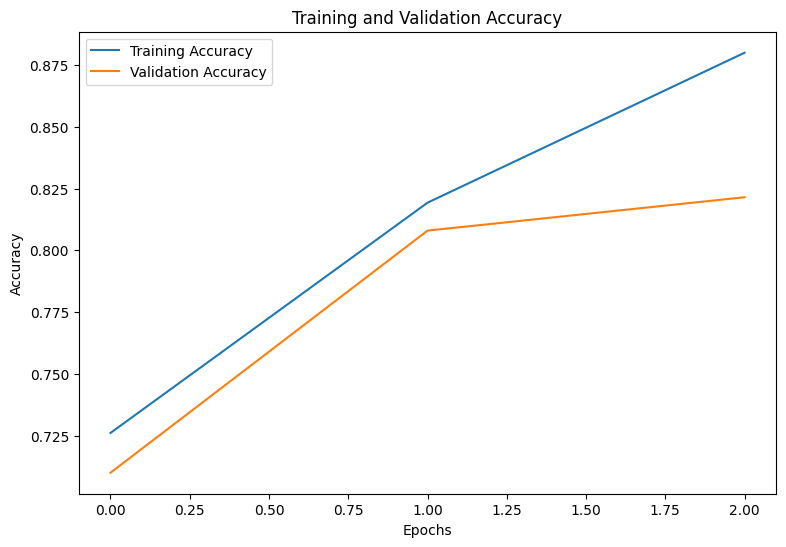

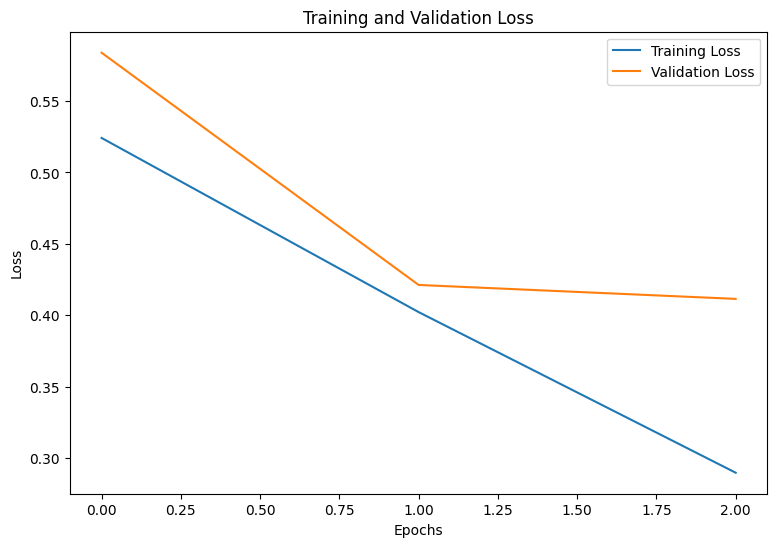

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the best parameters from GridSearchCV results
best_params = grid_search.best_params_

# Extract best parameters
lstm_units = best_params['model__lstm_units']
embedding_dim = best_params['model__embedding_dim']
dropout_rate = best_params['model__dropout_rate']
batch_size = best_params['batch_size']
epochs = best_params['epochs']
optimizer_name = best_params['optimizer']

# Define a function to create a BiLSTM model with the best hyperparameters
def build_best_bilstm_model(input_dim, lstm_units, embedding_dim, dropout_rate, optimizer):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dim))
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=dropout_rate, recurrent_dropout=0)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        optimizer = Adam()

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model using the best hyperparameters
input_dim = len(tokenizer.index_word) + 1  # Vocabulary size
best_model = build_best_bilstm_model(input_dim, lstm_units, embedding_dim, dropout_rate, optimizer_name)

# Train the model
history = best_model.fit(
    X_train_seq_padded, 
    y_train,
    validation_data=(X_test_seq_padded, y_test),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluate the model on the test set
eval_results = best_model.evaluate(X_test_seq_padded, y_test)
print(f"Test loss: {eval_results[0]}, Test accuracy: {eval_results[1]}")

# Visualizing training history (accuracy and loss)
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

# Plotting training and validation accuracy
plt.figure(figsize=(9, 6))
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Training and Validation Accuracy")
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(9, 6))
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Training and Validation Loss")
plt.show()


In [14]:
# Evaluate the model
y_pred_prob = best_model.predict(X_test_seq_padded)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 7: Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Model Accuracy: 82.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       893
           1       0.84      0.84      0.84      1107

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

